In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



In [57]:
dfHotels = pd.read_csv('./Dataset/hotels.csv')
dfHotels.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


In [58]:
dfHotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_id              25 non-null     int64  
 1   hotel_name            25 non-null     object 
 2   city                  25 non-null     object 
 3   country               25 non-null     object 
 4   star_rating           25 non-null     int64  
 5   lat                   25 non-null     float64
 6   lon                   25 non-null     float64
 7   cleanliness_base      25 non-null     float64
 8   comfort_base          25 non-null     float64
 9   facilities_base       25 non-null     float64
 10  location_base         25 non-null     float64
 11  staff_base            25 non-null     float64
 12  value_for_money_base  25 non-null     float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.7+ KB


In [59]:
dfReviews = pd.read_csv('./Dataset/reviews.csv')
dfReviews.head()


,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...


In [60]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   review_date            50000 non-null  object 
 4   score_overall          50000 non-null  float64
 5   score_cleanliness      50000 non-null  float64
 6   score_comfort          50000 non-null  float64
 7   score_facilities       50000 non-null  float64
 8   score_location         50000 non-null  float64
 9   score_staff            50000 non-null  float64
 10  score_value_for_money  50000 non-null  float64
 11  review_text            50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB


In [61]:
dfUsers = pd.read_csv('./Dataset/users.csv')
dfUsers.head()


,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18


In [62]:
dfUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         2000 non-null   int64 
 1   user_gender     2000 non-null   object
 2   country         2000 non-null   object
 3   age_group       2000 non-null   object
 4   traveller_type  2000 non-null   object
 5   join_date       2000 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB


In [63]:
dfUsers['age_group'].value_counts()

age_group
25-34    653
35-44    611
45-54    317
18-24    218
55+      201
Name: count, dtype: int64

In [64]:
dfUsers['user_gender'].value_counts()

user_gender
Male      942
Female    864
Other     194
Name: count, dtype: int64

In [65]:
dfUsers['traveller_type'].value_counts()

traveller_type
Couple      694
Family      478
Solo        420
Business    408
Name: count, dtype: int64

In [66]:
dfUsers = pd.get_dummies(dfUsers, columns=['user_gender'], drop_first=False)
dfUsers = dfUsers.drop(columns=['user_gender_Other'])

In [67]:
dfUsers.head()

,user_id,country,age_group,traveller_type,join_date,user_gender_Female,user_gender_Male
0,1,United Kingdom,35-44,Solo,2024-09-29,True,False
1,2,United Kingdom,25-34,Solo,2023-11-29,False,True
2,3,Mexico,25-34,Family,2022-04-03,True,False
3,4,India,35-44,Family,2023-12-02,False,True
4,5,Japan,25-34,Solo,2021-12-18,False,False


In [68]:
dfHotels['country'].value_counts()

country
United States           1
United Kingdom          1
France                  1
Japan                   1
United Arab Emirates    1
Singapore               1
Australia               1
Brazil                  1
Germany                 1
Canada                  1
China                   1
Mexico                  1
India                   1
Italy                   1
South Africa            1
South Korea             1
Russia                  1
Egypt                   1
Spain                   1
Thailand                1
Turkey                  1
Netherlands             1
Argentina               1
Nigeria                 1
New Zealand             1
Name: count, dtype: int64

In [69]:
country_group = {
    # North America
    'United States': 'North_America',
    'Canada': 'North_America',

    # Western Europe
    'Germany': 'Western_Europe',
    'France': 'Western_Europe',
    'United Kingdom': 'Western_Europe',
    'Netherlands': 'Western_Europe',
    'Spain': 'Western_Europe',
    'Italy': 'Western_Europe',

    # Eastern Europe
    'Russia': 'Eastern_Europe',

    # East Asia
    'China': 'East_Asia',
    'Japan': 'East_Asia',
    'South Korea': 'East_Asia',

    # Southeast Asia
    'Thailand': 'Southeast_Asia',
    'Singapore': 'Southeast_Asia',

    # Middle East
    'United Arab Emirates': 'Middle_East',
    'Turkey': 'Middle_East',

    # Africa
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',

    # South America
    'Brazil': 'South_America',
    'Argentina': 'South_America',

    # South Asia
    'India': 'South_Asia',

    # North America (Mexico)
    'Mexico': 'North_America_Mexico'
}


# Create the new column
dfHotels['country_group'] = dfHotels['country'].map(country_group)

In [70]:
dfHotels.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base,country_group
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0,North_America
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9,Western_Europe
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1,Western_Europe
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2,East_Asia
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5,Middle_East


In [71]:
df = dfReviews.merge(dfUsers, on='user_id', how='left')
df = df.merge(dfHotels[['hotel_id', 'city']], on='hotel_id', how='left')

In [72]:
df.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text,country,age_group,traveller_type,join_date,user_gender_Female,user_gender_Male,city
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...,New Zealand,25-34,Solo,2021-03-21,True,False,New York
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...,United Kingdom,35-44,Couple,2025-04-01,True,False,Tokyo
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...,Spain,55+,Couple,2021-10-28,True,False,Cairo
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...,United Kingdom,35-44,Business,2023-10-10,True,False,Barcelona
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...,Australia,45-54,Family,2023-02-28,False,True,Moscow


In [73]:
df= df.drop(columns=['review_date' , 'score_cleanliness' ,'score_value_for_money', 'score_comfort' , 'score_facilities' , 'score_location' , 'score_staff' , 'review_text' , 'age_group' , 'join_date', 'user_gender_Female' , 'user_gender_Male'])

In [74]:
df.head()


,review_id,user_id,hotel_id,score_overall,country,traveller_type,city
0,1,1600,1,8.7,New Zealand,Solo,New York
1,2,432,4,9.1,United Kingdom,Couple,Tokyo
2,3,186,18,8.8,Spain,Couple,Cairo
3,4,1403,19,8.9,United Kingdom,Business,Barcelona
4,5,1723,17,9.1,Australia,Family,Moscow


In [75]:
df.tail(10)

,review_id,user_id,hotel_id,score_overall,country,traveller_type,city
49990,49991,13,19,9.0,Italy,Couple,Barcelona
49991,49992,927,24,8.7,Brazil,Solo,Lagos
49992,49993,1737,7,8.9,Japan,Family,Sydney
49993,49994,1427,12,8.7,Brazil,Family,Mexico City
49994,49995,327,16,9.2,United States,Family,Seoul
49995,49996,1786,24,8.4,Mexico,Business,Lagos
49996,49997,1739,8,8.8,New Zealand,Couple,Rio de Janeiro
49997,49998,1566,6,9.1,Russia,Couple,Singapore
49998,49999,10,21,9.0,United Kingdom,Solo,Istanbul
49999,50000,1626,19,9.2,Turkey,Family,Barcelona


In [76]:
avg_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index()


In [77]:
best_cities = avg_scores.loc[avg_scores.groupby('traveller_type')['score_overall'].idxmax()]


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\296232256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_cities, x='traveller_type', y='score_overall', palette='coolwarm')


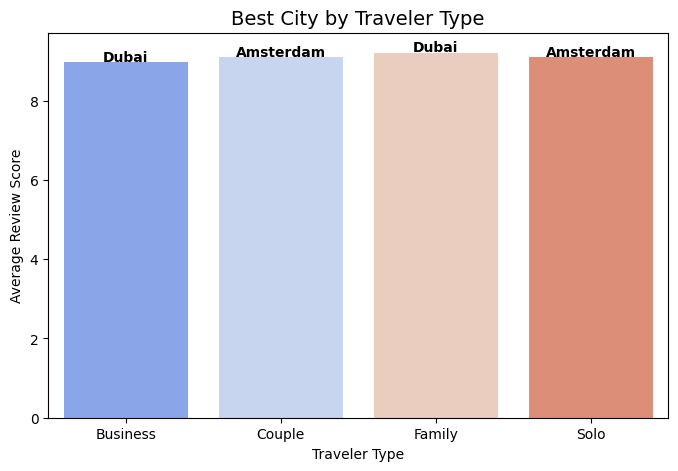

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(data=best_cities, x='traveller_type', y='score_overall', palette='coolwarm')

for i, (city, score) in enumerate(zip(best_cities['city'], best_cities['score_overall'])):
    plt.text(i, score + 0.02, city, ha='center', fontsize=10, fontweight='bold')

plt.title('Best City by Traveler Type', fontsize=14)
plt.xlabel('Traveler Type')
plt.ylabel('Average Review Score')
plt.ylim(0, best_cities['score_overall'].max() + 0.5)
plt.show()


In [79]:
for i, (trav_type, city, score) in enumerate(zip(best_cities['traveller_type'], 
                                                 best_cities['city'], 
                                                 best_cities['score_overall'])):
    print(f"{trav_type}: {city} — Average Score: {score:.2f}")

Business: Dubai — Average Score: 8.97
Couple: Amsterdam — Average Score: 9.10
Family: Dubai — Average Score: 9.21
Solo: Amsterdam — Average Score: 9.11


In [80]:
# Merge reviews with hotels (to get country)
merged = dfReviews.merge(dfHotels, on='hotel_id', how='left')

# Merge with users (to get age group and traveler info)
merged = merged.merge(dfUsers, on='user_id', how='left')


In [81]:
print(merged.columns)


Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money', 'review_text',
       'hotel_name', 'city', 'country_x', 'star_rating', 'lat', 'lon',
       'cleanliness_base', 'comfort_base', 'facilities_base', 'location_base',
       'staff_base', 'value_for_money_base', 'country_group', 'country_y',
       'age_group', 'traveller_type', 'join_date', 'user_gender_Female',
       'user_gender_Male'],
      dtype='object')


In [82]:
avg_scoresv = (
    merged.groupby(['age_group', 'country_x'])['score_value_for_money']
    .mean()
    .reset_index()
    .rename(columns={'country_x': 'country'})
)


In [83]:
top3_per_age = (
    avg_scoresv
    .sort_values(['age_group', 'score_value_for_money'], ascending=[True, False])
    .groupby('age_group')
    .head(3)
)


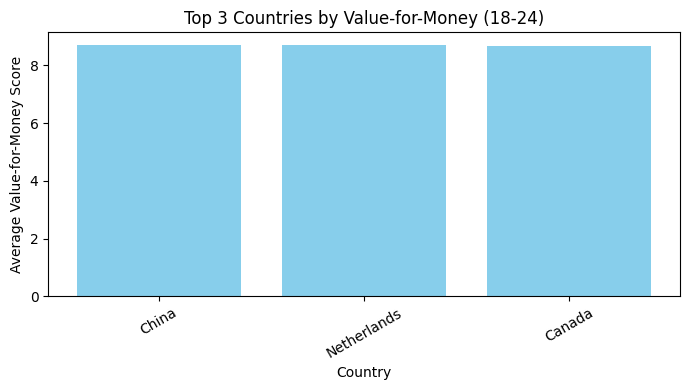

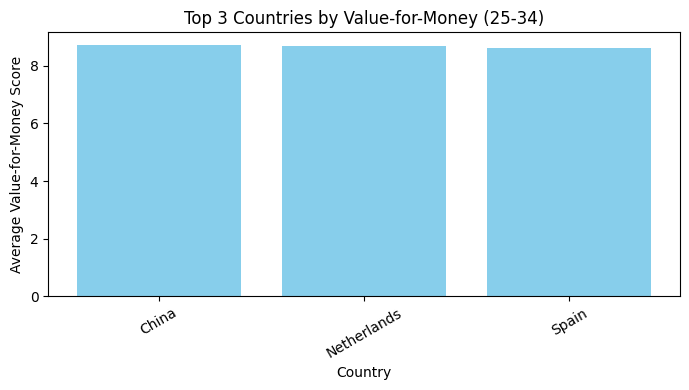

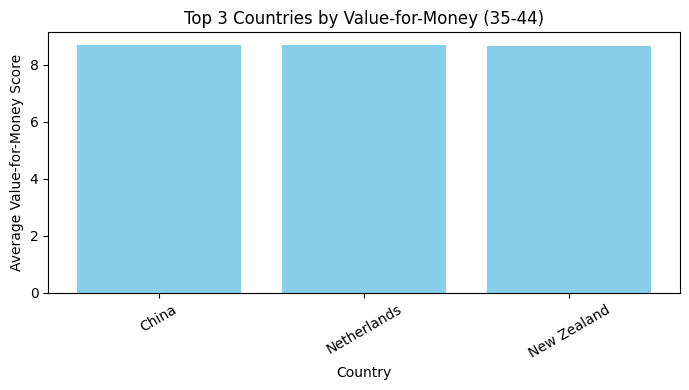

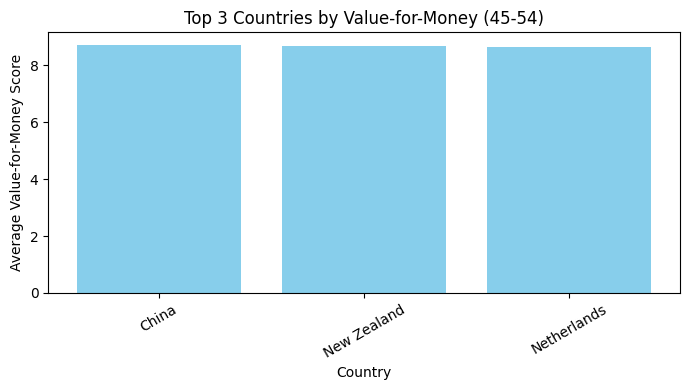

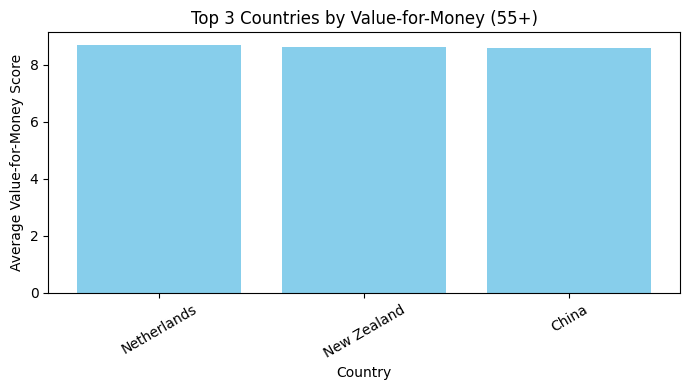

In [84]:
# Plot one chart per age group
for age_group, group_data in top3_per_age.groupby('age_group'):
    plt.figure(figsize=(7,4))
    plt.bar(group_data['country'], group_data['score_value_for_money'], color='skyblue')
    plt.title(f'Top 3 Countries by Value-for-Money ({age_group})')
    plt.ylabel('Average Value-for-Money Score')
    plt.xlabel('Country')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


In [85]:
for i, (age_group, country, score) in enumerate(zip(
        top3_per_age['age_group'], 
        top3_per_age['country'], 
        top3_per_age['score_value_for_money'])):
    
    print(f"{age_group}: {country} — Average Value-for-Money Score: {score:.2f}")


18-24: China — Average Value-for-Money Score: 8.71
18-24: Netherlands — Average Value-for-Money Score: 8.70
18-24: Canada — Average Value-for-Money Score: 8.66
25-34: China — Average Value-for-Money Score: 8.73
25-34: Netherlands — Average Value-for-Money Score: 8.68
25-34: Spain — Average Value-for-Money Score: 8.63
35-44: China — Average Value-for-Money Score: 8.70
35-44: Netherlands — Average Value-for-Money Score: 8.69
35-44: New Zealand — Average Value-for-Money Score: 8.65
45-54: China — Average Value-for-Money Score: 8.72
45-54: New Zealand — Average Value-for-Money Score: 8.67
45-54: Netherlands — Average Value-for-Money Score: 8.65
55+: Netherlands — Average Value-for-Money Score: 8.70
55+: New Zealand — Average Value-for-Money Score: 8.63
55+: China — Average Value-for-Money Score: 8.60


In [86]:
merged.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,...,location_base,staff_base,value_for_money_base,country_group,country_y,age_group,traveller_type,join_date,user_gender_Female,user_gender_Male
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,...,9.5,8.6,8.0,North_America,New Zealand,25-34,Solo,2021-03-21,True,False
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,8.5,9.5,8.2,East_Asia,United Kingdom,35-44,Couple,2025-04-01,True,False
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,...,9.1,8.7,8.4,Africa,Spain,55+,Couple,2021-10-28,True,False
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,9.7,9.0,8.8,Western_Europe,United Kingdom,35-44,Business,2023-10-10,True,False
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,9.0,9.1,8.6,Eastern_Europe,Australia,45-54,Family,2023-02-28,False,True


In [87]:
merged = merged.rename(columns={
    "country_x": "country_hotel",
    "country_y": "country_user"
})

In [88]:
print(merged.columns)

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money', 'review_text',
       'hotel_name', 'city', 'country_hotel', 'star_rating', 'lat', 'lon',
       'cleanliness_base', 'comfort_base', 'facilities_base', 'location_base',
       'staff_base', 'value_for_money_base', 'country_group', 'country_user',
       'age_group', 'traveller_type', 'join_date', 'user_gender_Female',
       'user_gender_Male'],
      dtype='object')


In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

In [90]:
merged= pd.get_dummies(merged, columns=['age_group'], drop_first=False)



In [91]:
merged = merged.drop(columns=['age_group_55+'])

In [92]:
merged= pd.get_dummies(merged, columns=['traveller_type'], drop_first=False)

In [93]:
merged=merged.drop(columns=['traveller_type_Solo'])

In [94]:
merged.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,...,join_date,user_gender_Female,user_gender_Male,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,traveller_type_Business,traveller_type_Couple,traveller_type_Family
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,...,2021-03-21,True,False,False,True,False,False,False,False,False
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,2025-04-01,True,False,False,False,True,False,False,True,False
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,...,2021-10-28,True,False,False,False,False,False,False,True,False
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,2023-10-10,True,False,False,False,True,False,True,False,False
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,2023-02-28,False,True,False,False,False,True,False,False,True


In [95]:
X = merged[['score_overall','score_cleanliness', 'score_comfort', 'score_facilities','score_location', 'score_staff', 'score_value_for_money',
           
            'age_group_18-24','age_group_25-34','age_group_35-44' , 'age_group_45-54','traveller_type_Business','traveller_type_Family','traveller_type_Couple','user_gender_Female','user_gender_Male']]
y = merged['country_group']


In [96]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)
print("Detected country groups:", le.classes_)

Detected country groups: ['Africa' 'East_Asia' 'Eastern_Europe' 'Middle_East' 'North_America'
 'North_America_Mexico' 'Oceania' 'South_America' 'South_Asia'
 'Southeast_Asia' 'Western_Europe']


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [100]:
print("Train data shape:",X_train.shape, "Train Label shape", y_train.shape)
print("Test data shape:",X_test.shape, "Test Label shape", y_test.shape)

Train data shape: (40000, 16) Train Label shape (40000,)
Test data shape: (10000, 16) Test Label shape (10000,)


In [101]:
from tensorflow.keras import backend as K
K.clear_session()

In [102]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [103]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy' , Precision(name='precision'), Recall(name='recall')])

In [104]:
history = model.fit(X_train_scaled, y_train_cat, epochs=50, validation_split=0.2,batch_size=32, verbose=1)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3235 - loss: 1.9734 - precision: 0.6317 - recall: 0.0527 - val_accuracy: 0.3490 - val_loss: 1.8709 - val_precision: 0.6348 - val_recall: 0.0771
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3585 - loss: 1.8428 - precision: 0.6417 - recall: 0.0976 - val_accuracy: 0.3587 - val_loss: 1.8252 - val_precision: 0.6278 - val_recall: 0.1056
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3679 - loss: 1.8106 - precision: 0.6443 - recall: 0.1123 - val_accuracy: 0.3627 - val_loss: 1.8076 - val_precision: 0.6169 - val_recall: 0.1161
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3691 - loss: 1.7947 - precision: 0.6486 - recall: 0.1211 - val_accuracy: 0.3658 - val_loss: 1.8027 - val_precision: 0.6184 - val_recall: 0.1280
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3735 - loss: 1.7860 - precision: 0.6419 - recall: 0.1254 - val_accuracy: 0.3683 - va


Test Accuracy: 0.3954 | Precision: 0.6627 | Recall: 0.1802
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       0.37      0.49      0.42      1226
           East_Asia       0.45      0.39      0.42      1216
      Eastern_Europe       0.24      0.05      0.08       394
         Middle_East       0.48      0.23      0.31       797
       North_America       0.43      0.30      0.35       792
North_America_Mexico       0.40      0.13      0.19       401
             Oceania       0.38      0.11      0.17       803
       South_America       0.32      0.30      0.31       784
          South_Asia       0.32      0.02      0.03       398
      Southeast_Asia       0.39      0.26      0.32       814
      Western_Europe       0.40      0.77      0.53      2375

            accuracy                           0.40     10000
           macro avg       0.38      0.28      0.29     10000
   

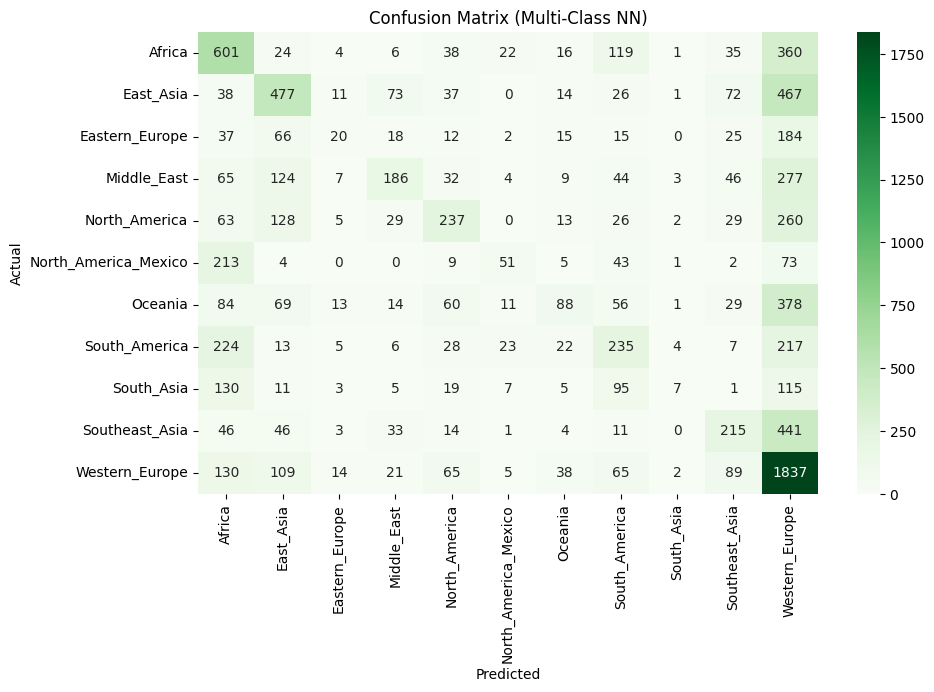

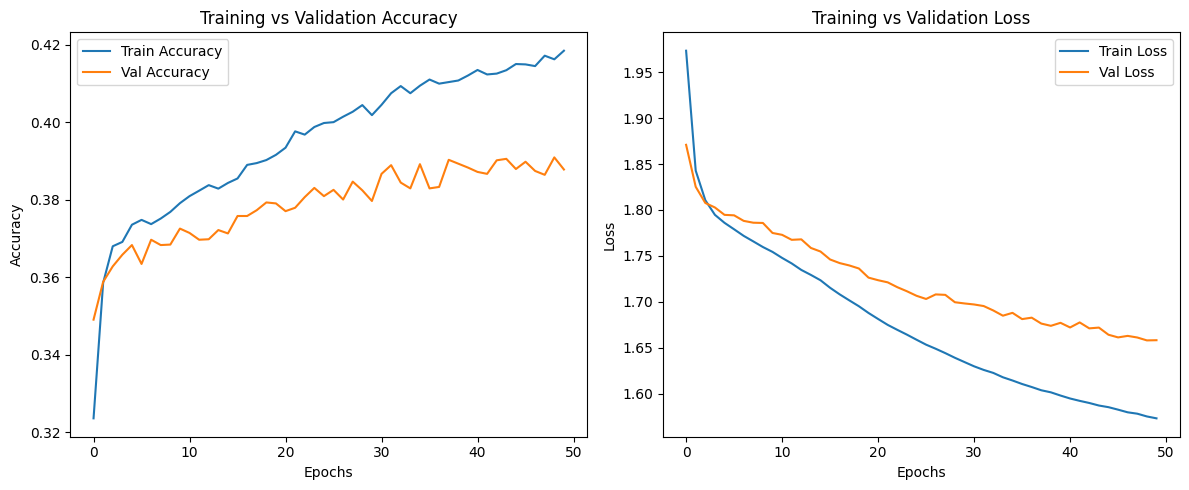

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
# --- Evaluate on test set ---
loss, acc, prec, rec = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")

# --- Predictions ---
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --- Confusion Matrix ---
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Greens')
plt.title("Confusion Matrix (Multi-Class NN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Plot training accuracy and loss ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
import shap
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [118]:
# Sample background data
background = shap.sample(X_train_scaled, 100, random_state=42)

# ✅ Use DeepExplainer for TensorFlow/Keras models
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled)

C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 16))']
  warnings.warn(msg)
C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 16))']
  warnings.warn(msg)
C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure


Global feature importance for class 0 (Africa):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


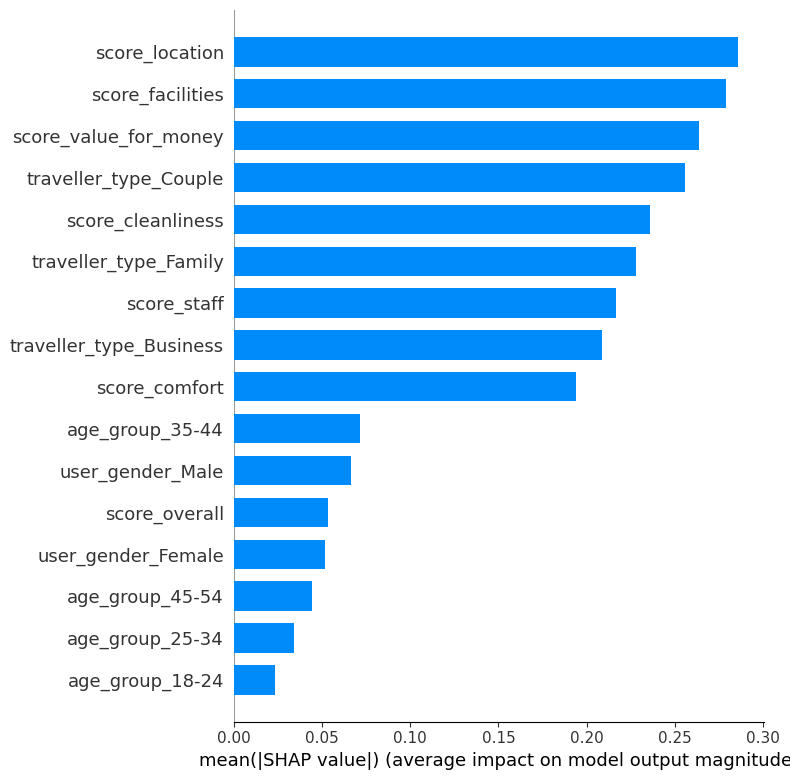


Global feature importance for class 1 (East_Asia):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


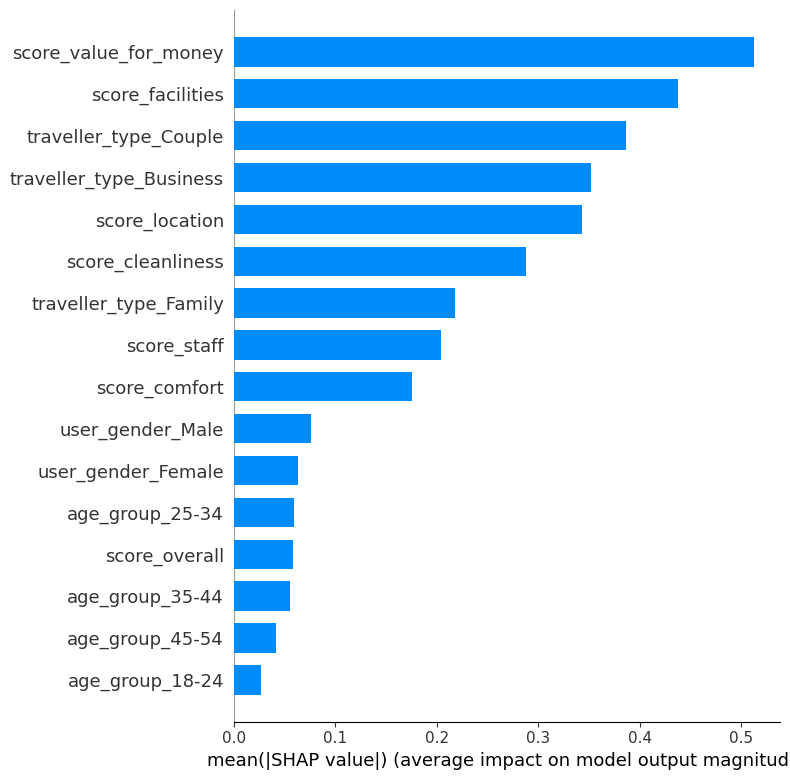


Global feature importance for class 2 (Eastern_Europe):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


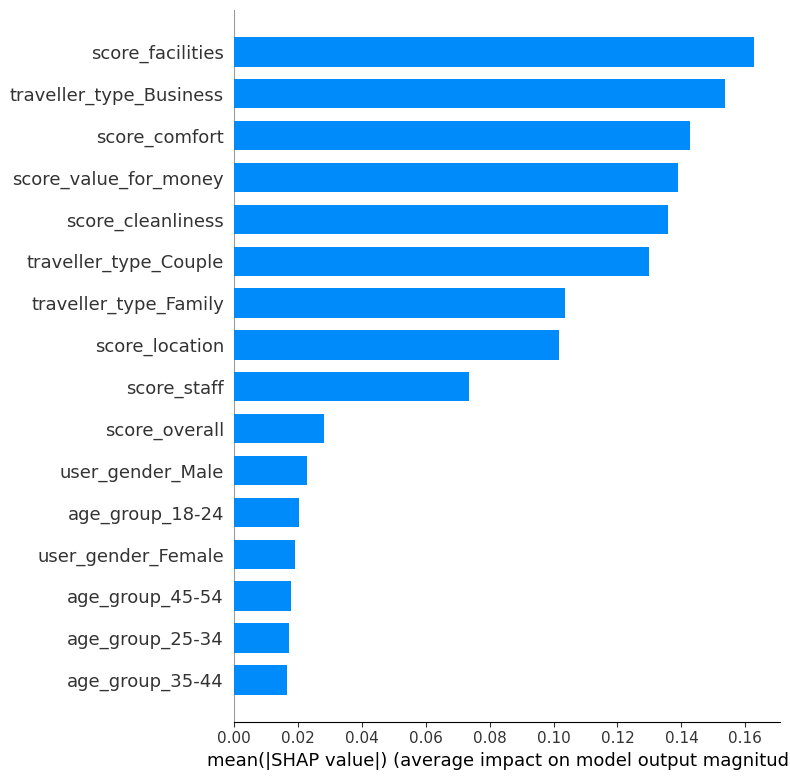


Global feature importance for class 3 (Middle_East):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


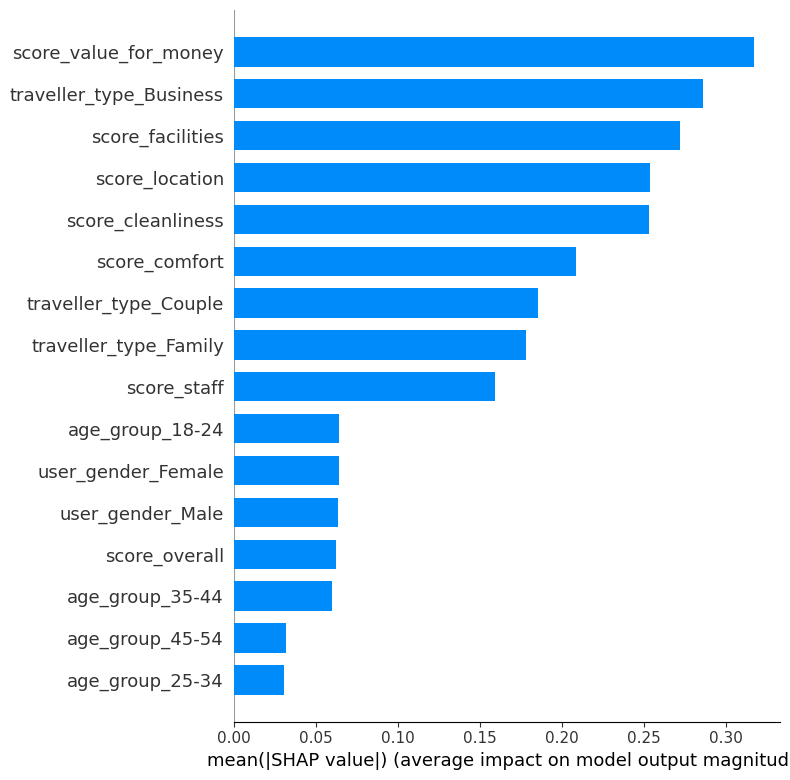


Global feature importance for class 4 (North_America):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


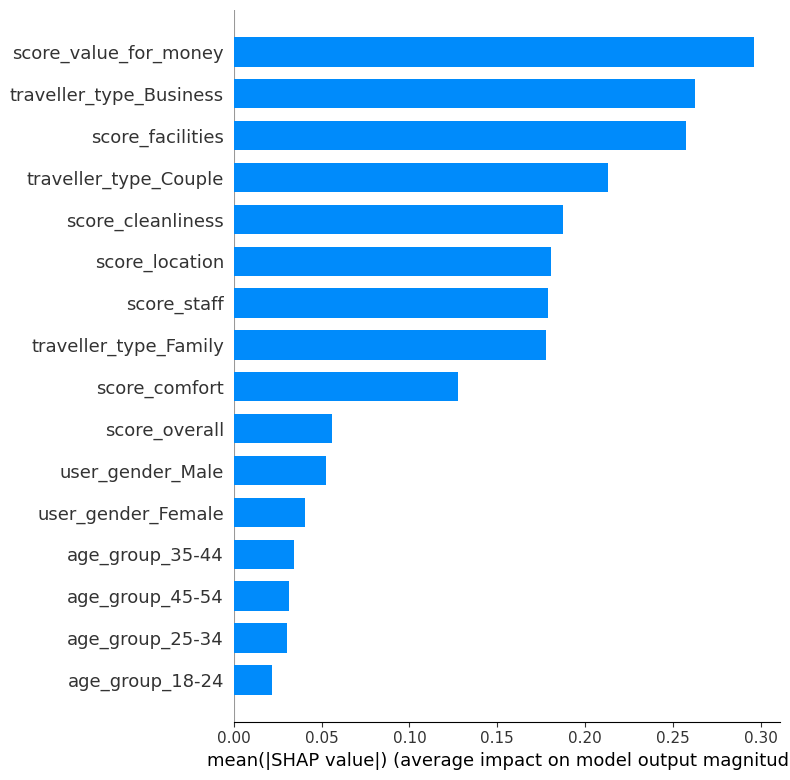


Global feature importance for class 5 (North_America_Mexico):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


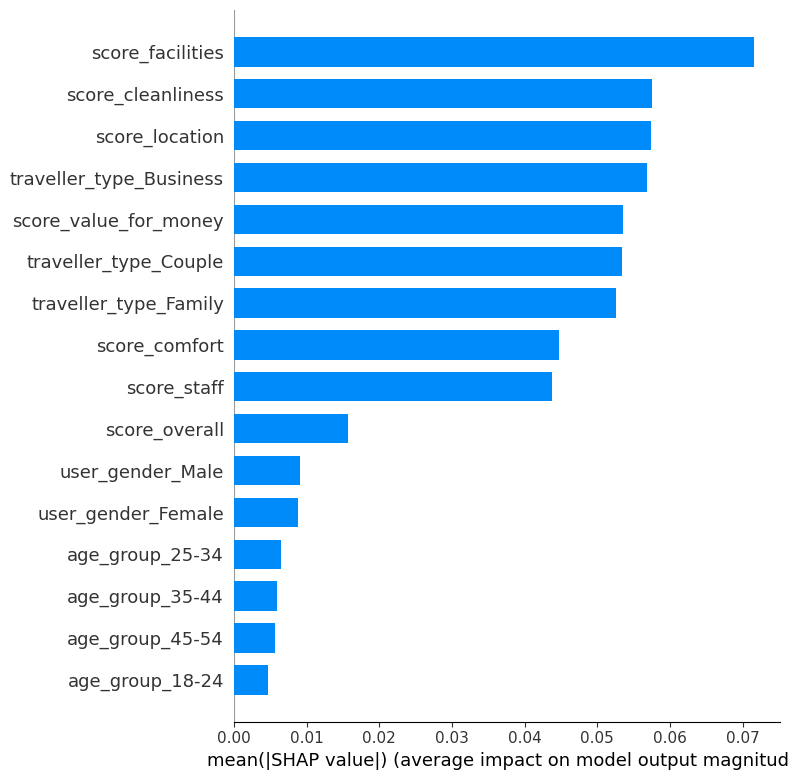


Global feature importance for class 6 (Oceania):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


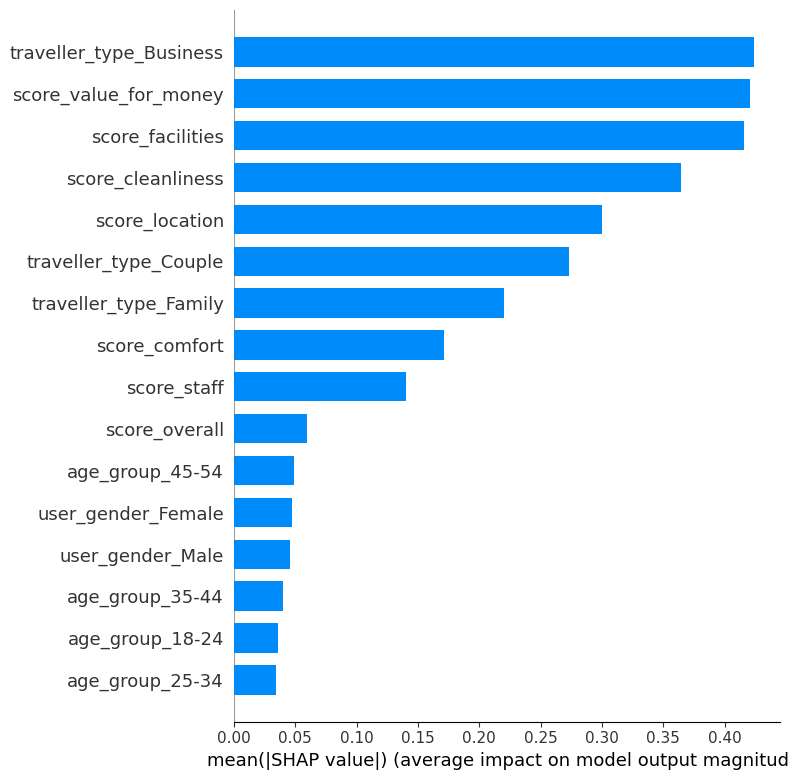


Global feature importance for class 7 (South_America):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


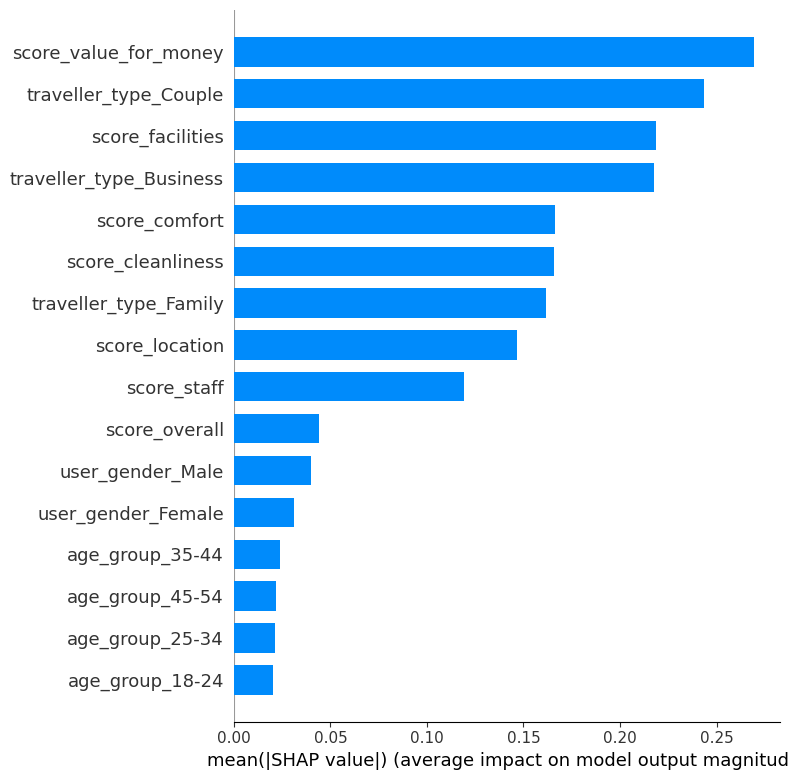


Global feature importance for class 8 (South_Asia):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


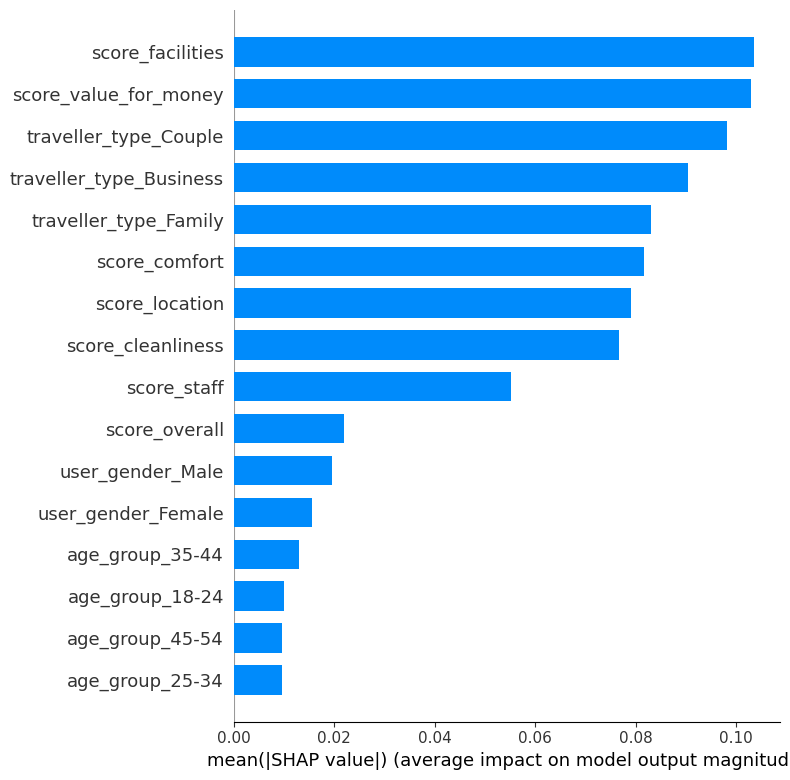


Global feature importance for class 9 (Southeast_Asia):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


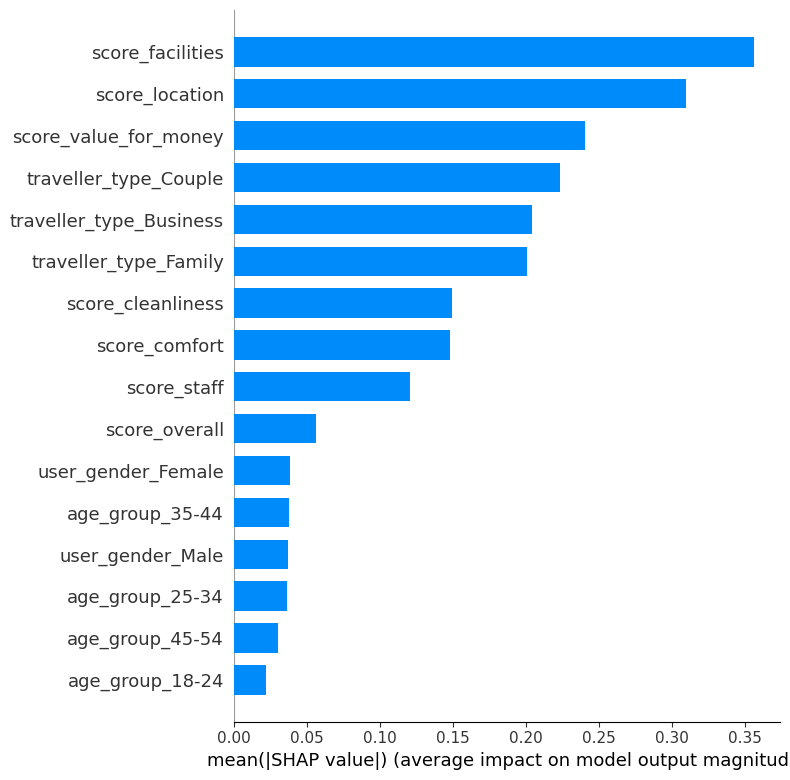


Global feature importance for class 10 (Western_Europe):


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\811568592.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


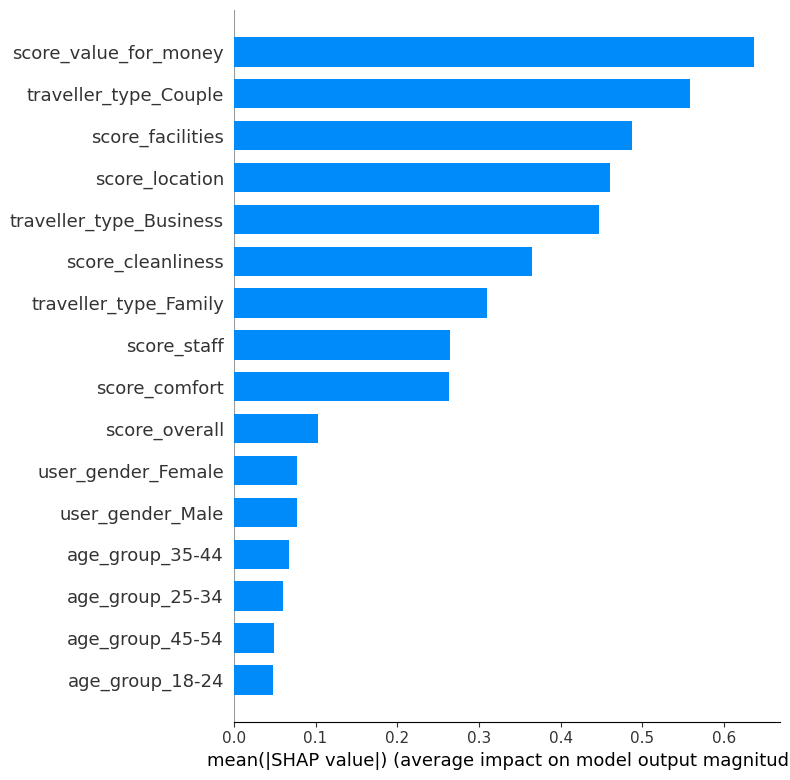

In [140]:
for c in range(shap_values.shape[2]):
    print(f"\nGlobal feature importance for class {c} ({le.classes_[c]}):")
    shap.summary_plot(
        shap_values[:, :, c],
        X_test_scaled,
        feature_names=X.columns,
        plot_type='bar'
    )


Showing SHAP summary for class index: 10


C:\Users\abdul\AppData\Local\Temp\ipykernel_36672\3560765751.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


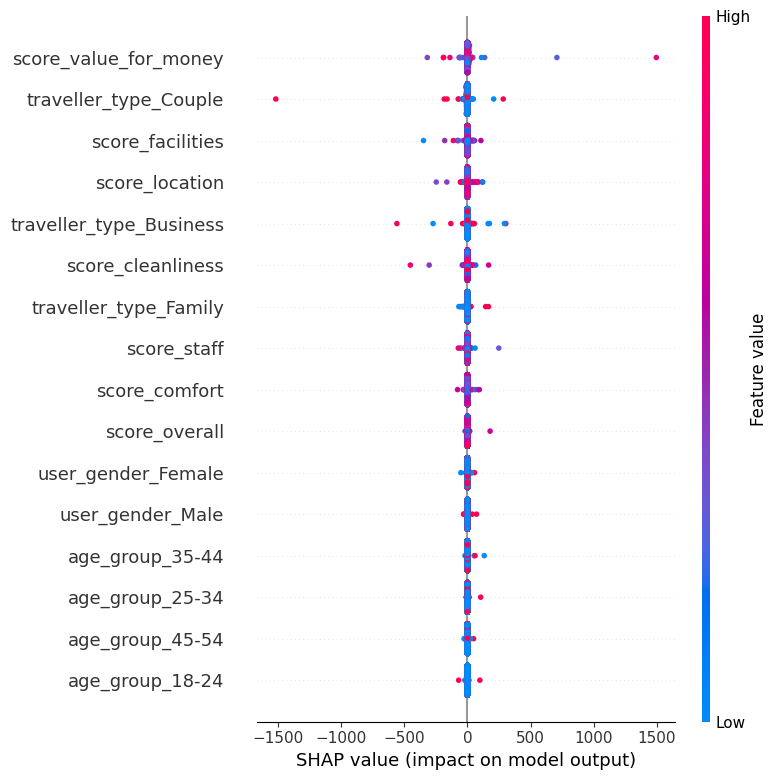

In [145]:
pred_class = np.argmax(np.mean(y_pred_probs, axis=0))  # or just set pred_class = 0
print(f"Showing SHAP summary for class index: {pred_class}")

shap.summary_plot(
    shap_values[:, :, pred_class],   # ✅ correct slicing for class
    X_test_scaled,
    feature_names=X.columns
)


In [127]:
def to_float(x):
    return float(x.numpy()) if hasattr(x, "numpy") else float(x)

In [138]:
i = 1
pred_class = np.argmax(y_pred_probs[i])

shap.initjs()
shap.force_plot(
    to_float(explainer.expected_value[pred_class]),
    shap_values[i, :, pred_class],
    pd.Series(X_test_scaled[i], index=X.columns)
)

In [125]:
# Check basic shapes
print("Shape of X_test_scaled:", X_test_scaled.shape)

# If X_test_scaled is a numpy array, print one sample
print("\nLength of one test sample (X_test_scaled[i]):", len(X_test_scaled[0]))

# Check your SHAP values object
if isinstance(shap_values, list):
    print("\nNumber of classes (len(shap_values)):", len(shap_values))
    print("Shape of shap_values[0]:", shap_values[0].shape)
    print("Shape of shap_values[pred_class]:", shap_values[pred_class].shape)
    print("Shape of shap_values[pred_class][i]:", shap_values[pred_class][i].shape)
else:
    print("\nSHAP values type:", type(shap_values))
    print("Shape of shap_values:", shap_values.shape)

# Check expected value
print("\nType of explainer.expected_value:", type(explainer.expected_value))
print("Value or shape of explainer.expected_value:", explainer.expected_value)

# Print the features for the instance being explained
print("\nType of X_test_scaled:", type(X_test_scaled))
print("Index:", getattr(X_test_scaled, 'columns', 'No columns - numpy array'))
print("Length of X.columns:", len(X.columns))
print("First 5 column names:", X.columns[:5].tolist())

# Verify the actual data sample
print("\nFeature values for instance i=0:")
print(pd.Series(X_test_scaled[0], index=X.columns).head())


Shape of X_test_scaled: (10000, 16)

Length of one test sample (X_test_scaled[i]): 16

SHAP values type: <class 'numpy.ndarray'>
Shape of shap_values: (10000, 16, 11)

Type of explainer.expected_value: <class 'tensorflow.python.framework.ops.EagerTensor'>
Value or shape of explainer.expected_value: tf.Tensor(
[0.12913105 0.08769628 0.03482247 0.07143494 0.06637049 0.04058887
 0.07921802 0.10141356 0.04517332 0.08300456 0.26114643], shape=(11,), dtype=float32)

Type of X_test_scaled: <class 'numpy.ndarray'>
Index: No columns - numpy array
Length of X.columns: 16
First 5 column names: ['score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location']

Feature values for instance i=0:
score_overall        0.314827
score_cleanliness    0.890830
score_comfort        0.179889
score_facilities    -1.289460
score_location       1.001950
dtype: float64
